In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


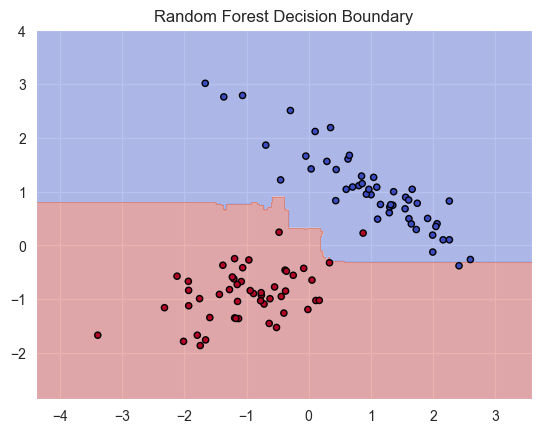

In [18]:
# 生成随机的分类数据集
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 初始化随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 在训练集上训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 输出结果
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 使用模型对网格中的点进行预测
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界图
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
plt.title("Random Forest Decision Boundary")
plt.show()
